## Poject notes:

### Plan, Analyze, Construct and Execute.

1. Build a logistic regression model, for a classification problem.

 - EDA.
    - Data source: **Tik-tok**
    - Stakeholders:
    - Understand variables data types and distributions.
    - Identify missing or invalid data, make appropiate transformations.
    - Identify **outliers**
        - Exclucion/Inclucion.
        - Subtitude extreme data with average data.
        - Remove values greater than 3 std.
        - Plots.
        - The four main binomial logistic regression assumptions are:
            1. Linearity,
            2. Independent observations,
            3. No multicollinearity, and
            4. No extreme outliers.
        - Feature engineer.
        - corr(method=pearson).
 - Model building and evaluation.
    - Pre-process.
        - Split data into independent and dependent variables.
        - One hot encode. (pd.get_dummies, OneHotEncode)
        - Normalize, scale
        - Split into train and test
        - Logistic Regression
        - **Train model**, use model with train data, make predictions with test data
        - Analyze, Accuracy, precision, recall, confusion matrix.
        - **Test model**, calculate same metrics with test data.
        - Write paragraph comparing the model train and test.  
 - Interpreting results.


In [51]:
import exploratory_data_analysis.eda_functions as eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
## metrics
from sklearn.metrics import accuracy_score,\
recall_score, precision_score, f1_score,\
confusion_matrix, classification_report, ConfusionMatrixDisplay

## VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

from sklearn.utils import resample

##from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import scipy
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings as cuidado
cuidado.filterwarnings('ignore')


In [52]:
df = pd.read_csv('tiktok_dataset.csv')

In [53]:
df.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [54]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [56]:
## Is there duplicated data?
not_duplicates = df.shape == df.drop_duplicates().shape
if not_duplicates == True:
    print('No Duplicates.')
else: print('Duplicated data.')

No Duplicates.


In [57]:
## Looking for missing information
eda.miss_df(df)

,Total,Percent
claim_status,298,1.537509
video_transcription_text,298,1.537509
video_view_count,298,1.537509
video_like_count,298,1.537509
video_share_count,298,1.537509
video_download_count,298,1.537509
video_comment_count,298,1.537509
#,0,0.000000
video_id,0,0.000000
video_duration_sec,0,0.000000


In [58]:
## The missing information is under 1.6%
## I consider apropiate to drop it.
## Also # and video_id are unique identifiers.
## not that much power.
df.drop(['#', 'video_id'], axis=1,inplace=True)
df.dropna(inplace=True)

In [59]:
## Validation and checking for invalid strings.
eda.get_invalid_values(df).iloc[:,1:]

,nulls,invalids,unique_item
claim_status,0,0,"[claim, opinion]"
video_duration_sec,0,0,"[59, 32, 31, 25, 19, 35, 16, 41, 50, 45, 47, 3..."
video_transcription_text,0,0,[someone shared with me that drone deliveries ...
verified_status,0,0,"[not verified, verified]"
author_ban_status,0,0,"[under review, active, banned]"
video_view_count,0,0,"[343296.0, 140877.0, 902185.0, 437506.0, 56167..."
video_like_count,0,0,"[19425.0, 77355.0, 97690.0, 239954.0, 34987.0,..."
video_share_count,0,0,"[241.0, 19034.0, 2858.0, 34812.0, 4110.0, 6230..."
video_download_count,0,0,"[1.0, 1161.0, 833.0, 1234.0, 547.0, 4293.0, 86..."
video_comment_count,0,0,"[0.0, 684.0, 329.0, 584.0, 152.0, 1857.0, 5446..."


### Visuals of distributions, outlier identification and class balance checks.

In [60]:
## Dividing the data into objects and continious
nums = eda.sift_data_type(df)['nums']
objs = eda.sift_data_type(df)['objs']

In [61]:
categories = ['claim_status', 'verified_status','author_ban_status']
txt     = ['video_transcription_text']

## Notes:Tukey's method

Detecting outliers

### Tukey's method

*Tukey's method* is also known as the interquartile range (IQR) method.

the IQR is the range between the first and the third quartiles. This method considers outliers to be all values that are outside the threshold of 1.5 times the IQR. However, you can change this threshold to other values.

In [62]:
## Identifying and counting the number of outliers
## both directions.

q25 = df['video_like_count'].quantile(0.25)
q75 = df['video_like_count'].quantile(0.75)
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):

    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)

    outl = len((np.where((df['video_like_count'] > max_val)
                      | (df['video_like_count'] < min_val))[0]))

    print(f'The score threshold is: {threshold}')
    print(f'Number of outliers is: {outl}')


The score threshold is: 1.0
Number of outliers is: 2498
The score threshold is: 1.5
Number of outliers is: 1726
The score threshold is: 2.0
Number of outliers is: 1111
The score threshold is: 2.5
Number of outliers is: 671
The score threshold is: 3.0
Number of outliers is: 334
The score threshold is: 3.5
Number of outliers is: 126
The score threshold is: 4.0
Number of outliers is: 18
The score threshold is: 4.5
Number of outliers is: 0


In [63]:
## Limiting outliers

q25 = df['video_like_count'].quantile(0.25)
q75 = df['video_like_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = q75 + 1.5 * iqr
df.loc[df['video_like_count'] > upper_limit, 'video_like_count'] = upper_limit

## Limiting outliers

q25 = df['video_share_count'].quantile(0.25)
q75 = df['video_share_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = q75 + 1.5 * iqr
df.loc[df['video_share_count'] > upper_limit, 'video_share_count'] = upper_limit


q25 = df['video_download_count'].quantile(0.25)
q75 = df['video_download_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = q75 + 1.5 * iqr
df.loc[df['video_download_count'] > upper_limit, 'video_download_count']\
 = upper_limit

## Limiting outliers

q25 = df['video_comment_count'].quantile(0.25)
q75 = df['video_comment_count'].quantile(0.75)

iqr = q75 - q25
upper_limit = q75 + 1.5 * iqr
df.loc[df['video_comment_count'] > upper_limit, 'video_comment_count']\
 = upper_limit

### Observing Distribution of the continious variables and responce.

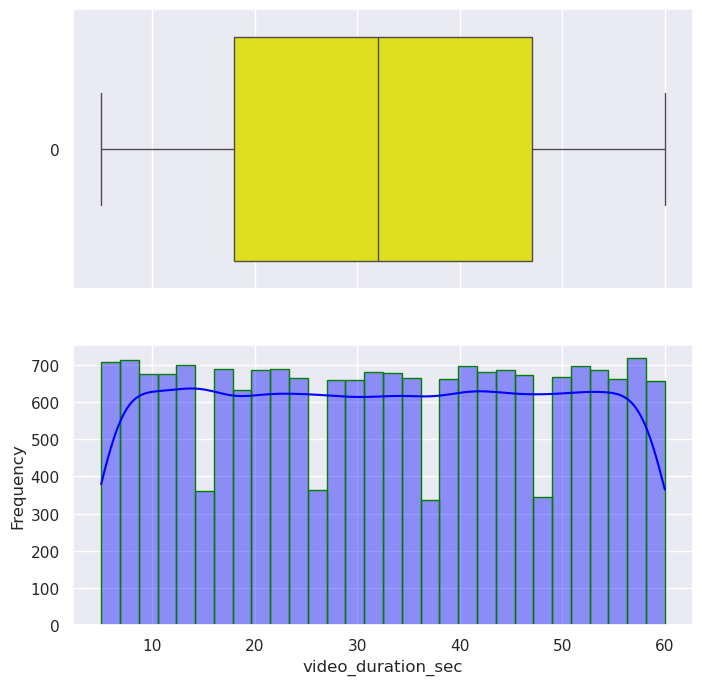

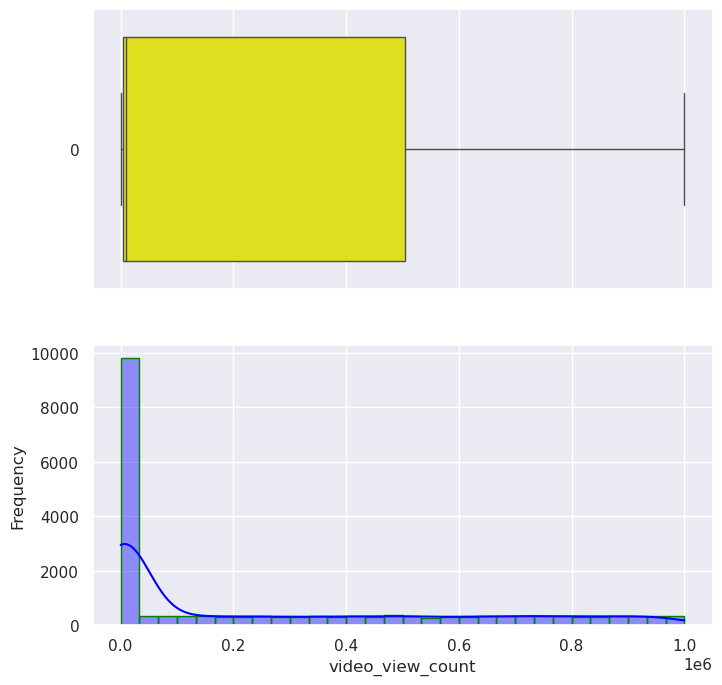

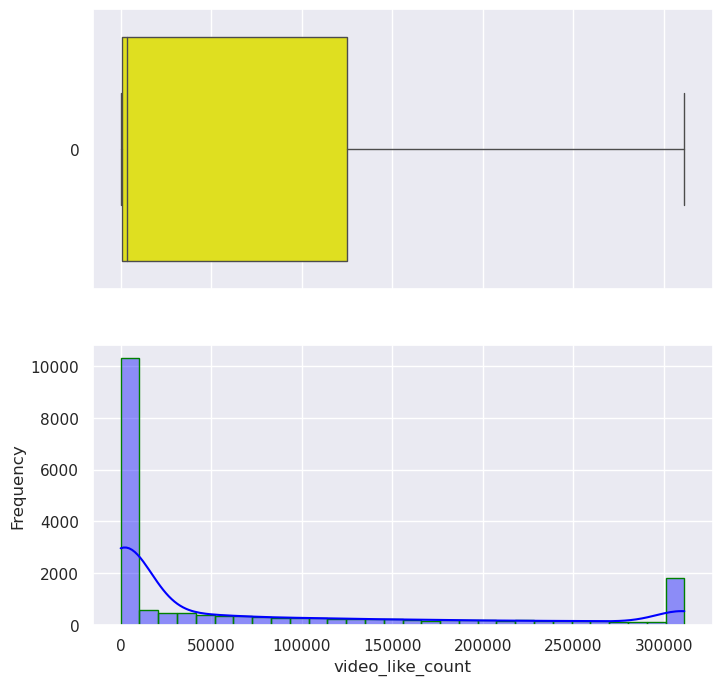

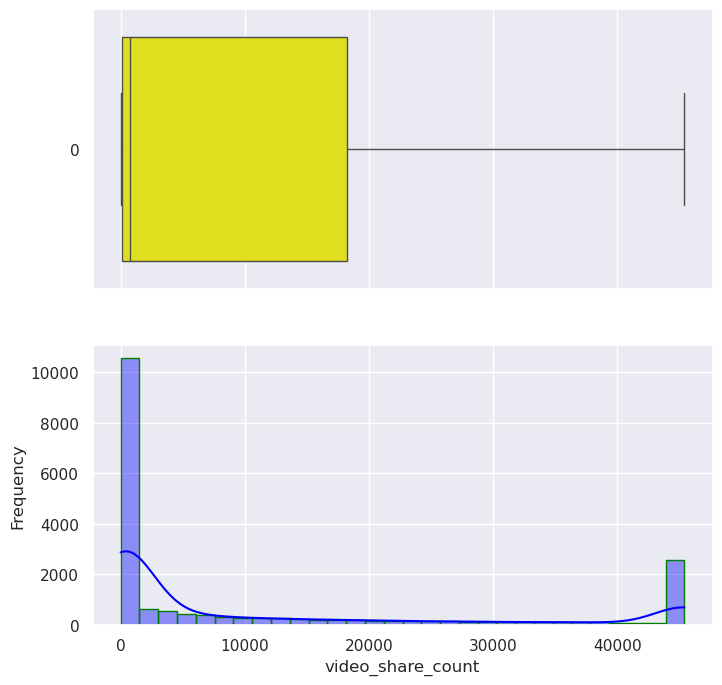

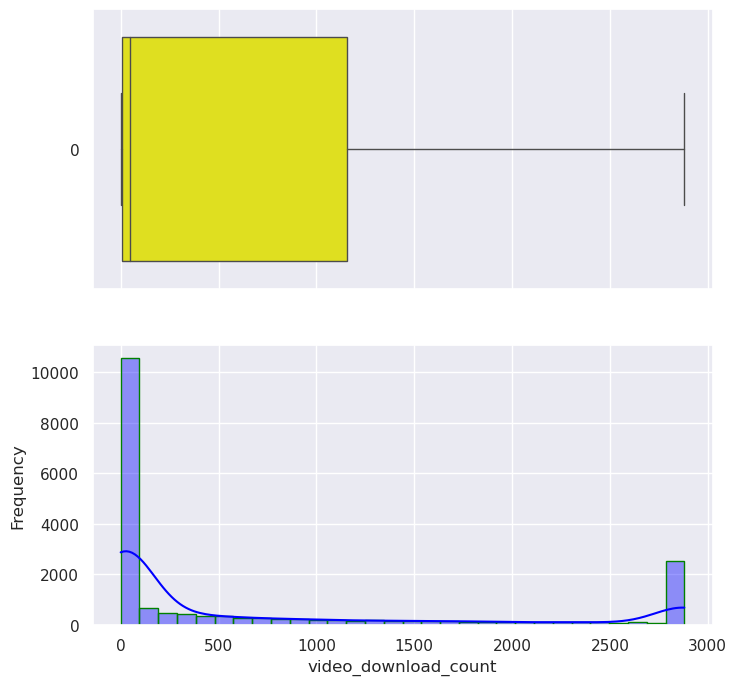

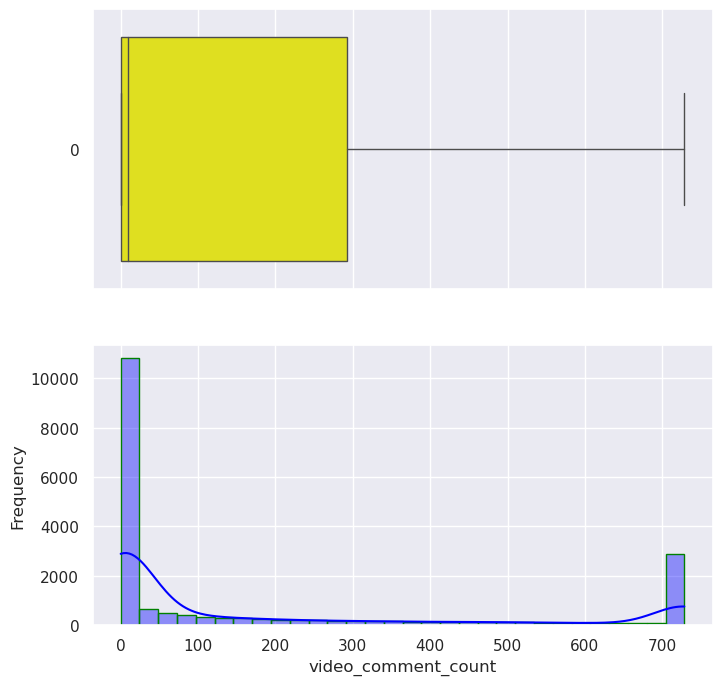

In [64]:
## Observing Distribution of the continious variables and responce.
##

for i in df[nums]:
    sns.set(rc={"figure.figsize":(8, 8)});
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency');

    sns.boxplot(df[i], orient='h', ax=ax_box , linewidth= 1.0, color='yellow');
    sns.histplot(df[i], ax=ax_hist , bins = 30, kde=True, color='blue', edgecolor='green', alpha=0.4);


In [65]:
## We could do the same (apply limit areas) with winsorize at (0, 0.25)
'''
df['video_like_count']    = winsorize(df['video_like_count'], (0, 0.2))
df['video_view_count']    = winsorize(df['video_view_count'], (0, 0.2))
df['video_comment_count'] = winsorize(df['video_comment_count'], (0, 0.2))
df['video_share_count']   = winsorize(df['video_share_count'], (0, 0.2))
df['video_download_count']= winsorize(df['video_download_count'], (0, 0.2))
'''

"\ndf['video_like_count']    = winsorize(df['video_like_count'], (0, 0.2))\ndf['video_view_count']    = winsorize(df['video_view_count'], (0, 0.2))\ndf['video_comment_count'] = winsorize(df['video_comment_count'], (0, 0.2))\ndf['video_share_count']   = winsorize(df['video_share_count'], (0, 0.2))\ndf['video_download_count']= winsorize(df['video_download_count'], (0, 0.2))\n"

In [66]:
## Quick checks to the objects variables but the text transcription.
df[objs ^ ['video_transcription_text']].describe()

,author_ban_status,claim_status,verified_status
count,19084,19084,19084
unique,3,2,2
top,active,claim,not verified
freq,15383,9608,17884


In [67]:
## Check
df[nums].describe()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,32.423811,254708.558688,74323.538632,11246.910082,713.444836,181.023501
std,16.226470,322893.280814,107103.555220,16573.533466,1049.881393,272.084766
min,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,60.000000,999817.000000,311333.875000,45382.500000,2880.125000,728.500000


### Notes, Initial observations:
- Not that much normality on continious variables.
- The Classes on the categorical columns are not as balance as the target.
- I droped the missing data, also column `#` and `video_id` as I consider not that much value on this.
- `claim_status`: Binary, balanced, our target to predict.
- `verified_status`: Binary and unbalanced
- `author_ban_status`: 3 classes, not balanced
- `video_duration_sec`: Continious, videos in seconds between 5 and 60 seconds.
- `video_view_count`: Continious, the distribution shown has a positive skew. This means that it has a long tail in the positive direction.
- `video_like_count`: Continious, the distribution shown has a positive skew.
- `video_share_count`: Continious, the distribution shown has a positive skew.
- `video_download_count`: Continious, the distribution shown has a positive skew.
- `video_comment_count`:Continious, the distribution shown has a positive skew.

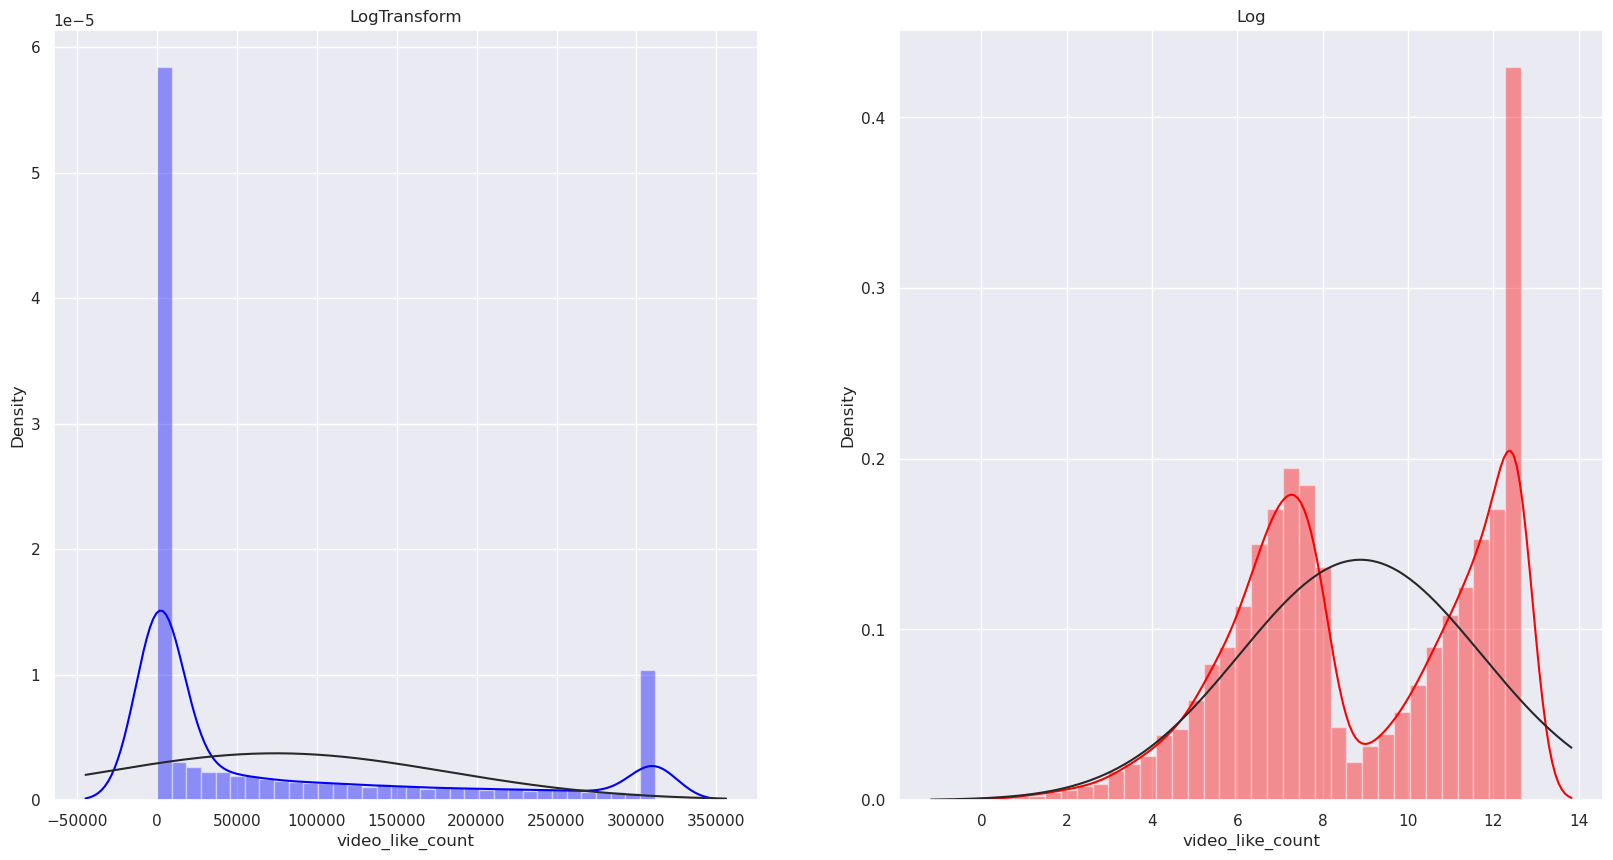

In [68]:
## Just observing how a tranformation change distribution.
## We can also notice the filter action (q.75) that we added.
## on the higher values
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.distplot(df['video_like_count'], kde=True, fit=scipy.stats.norm , color='Blue')
plt.title('LogTransform')
plt.subplot(1, 2, 2)
sns.distplot(np.log1p(df['video_like_count']), kde=True, fit=scipy.stats.norm, color='Red') ## fits is deprecated, still good to demo.
plt.title('Log');

### Review classes weights, and re-balance

------- CLASS COUNTS --------------------

---------CLAIM_STATUS--------------------
9476, is: 49.6542% of the total
9608, is: 50.3458% of the total
This is the way, balance
------------------------------------------
count     19084
unique        2
top       claim
freq       9608
Name: claim_status, dtype: object
------------------------------------------
---------VERIFIED_STATUS--------------------
1200, is: 6.288% of the total
17884, is: 93.712% of the total
not balance, unfortunately This is not the way
------------------------------------------
count            19084
unique               2
top       not verified
freq             17884
Name: verified_status, dtype: object
------------------------------------------
---------AUTHOR_BAN_STATUS--------------------
2066, is: 11.8402% of the total
15383, is: 88.1598% of the total
not balance, unfortunately This is not the way
------------------------------------------
count      19084
unique         3
top       active
freq       15383
Nam

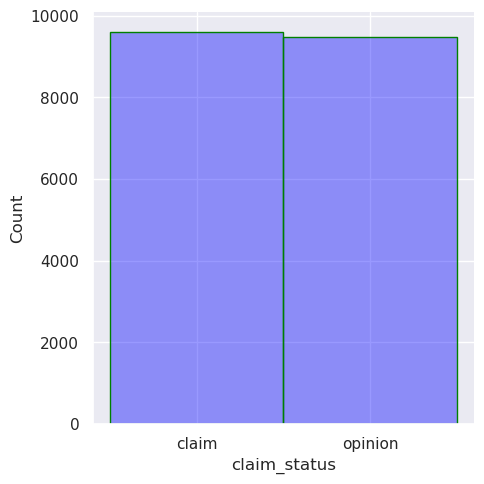

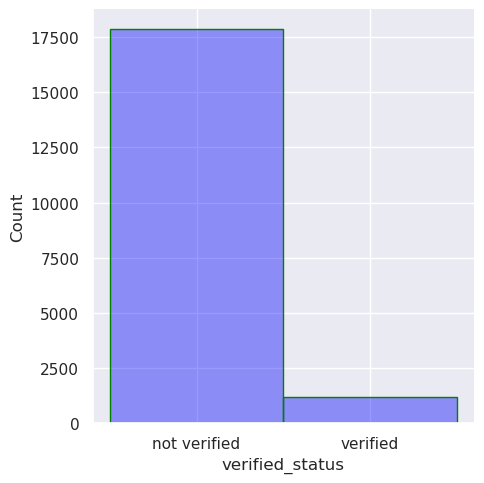

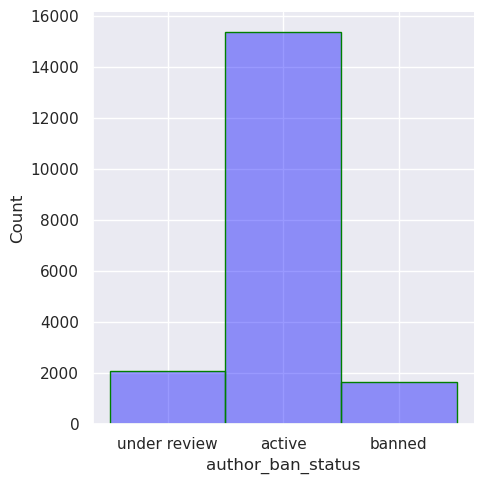

In [69]:
## Balance checking

def pct_checker(percentage, min_percentage, max_percentage):
    if percentage >= min_percentage and percentage <= max_percentage:
        return ('This is the way, balance')
    else:
        return ('not balance, unfortunately This is not the way')

print('------- CLASS COUNTS --------------------')
print()
for obj in categories:
    sns.displot(df, x=obj, color='blue', edgecolor='green', alpha=0.4)
    print(f'---------{str.upper(obj)}--------------------')
    #print(df[obj].value_counts())

    a = df[obj].value_counts()[0]
    b = df[obj].value_counts()[1]
    pct_a = a / ( a + b ) * 100
    pct_b = b / ( a + b ) * 100

    print(f'{b}, is: {round(pct_b, 4)}% of the total')
    print(f'{a}, is: {round(pct_a, 4)}% of the total')

    ##
    ## As pct depend of each other we just need one check
    print(pct_checker(pct_a, 40, 60))

    print('------------------------------------------')
    print(df[obj].describe())
    print('------------------------------------------')

In [70]:
clase_1 = df['verified_status'].unique()[0]
clase_2 = df['verified_status'].unique()[1]

primero = len(df['verified_status'].unique()[0])
segundo = len(df['verified_status'].unique()[1])

majority_class = None

if primero > segundo:
    majority_class = clase_1
else:
    majority_class = clase_2

print(majority_class)

not verified


### Upsampling minority class

In [71]:
from sklearn.utils import resample

def upsample_minority_class(data, feature):

    '''
    Upsamples the minority in a binary class in a DataFrame
    to match the size of the majority class.

      Args:
        data: The DataFrame to be upsampled, pandas Data Frame.
        feature: the columns name, string.

      Returns:
        A DataFrame with the minority class upsampled.
    '''

    ## Identify data points from majority and minority classes

    clase_1 = data[feature].unique()[0]
    clase_2 = data[feature].unique()[1]

    primero = len(clase_1)
    segundo = len(clase_2)

    majority_class = None

    if primero > segundo:
        majority_class = clase_1
        minority_class = clase_2
    else:
        majority_class = clase_2
        minority_class = clase_1


    data_majority = data[data[feature] == majority_class]
    data_minority = data[data[feature] == clase_2]

    n_samples = len(data_majority)

    data_minority_upsampled = resample(
          data_minority,
          replace=True,
          n_samples=n_samples,
          random_state=42)

    data_upsampled = pd.concat([data_majority, \
                                data_minority_upsampled]).reset_index(drop=True)

    return data_upsampled


In [72]:
## Using the upsample_minority_class function
df2 = upsample_minority_class(df, 'verified_status')

In [73]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   claim_status              35768 non-null  object 
 1   video_duration_sec        35768 non-null  int64  
 2   video_transcription_text  35768 non-null  object 
 3   verified_status           35768 non-null  object 
 4   author_ban_status         35768 non-null  object 
 5   video_view_count          35768 non-null  float64
 6   video_like_count          35768 non-null  float64
 7   video_share_count         35768 non-null  float64
 8   video_download_count      35768 non-null  float64
 9   video_comment_count       35768 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 2.7+ MB


In [74]:
df2.columns

Index(['claim_status', 'video_duration_sec', 'video_transcription_text',
       'verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count'],
      dtype='object')

not verified    17884
verified        17884
Name: verified_status, dtype: int64


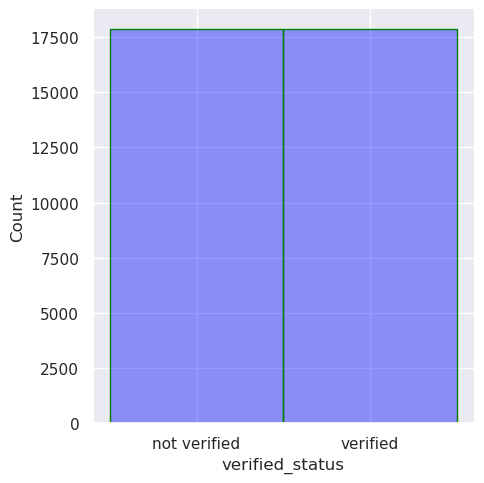

In [75]:
## Verification
print(df2['verified_status'].value_counts())
sns.displot(df2, x='verified_status', color='blue', edgecolor='green', alpha=0.4);

In [76]:
## Avg `video_transcription_text` length for claims
## and the average `video_transcription_text` length
## length for videos posted by unverified accounts.'verified_status'

not_v = df2[df2['verified_status'] == 'not verified']
yes_v = df2[df2['verified_status'] == 'verified']

avg_not_verify = not_v['video_transcription_text'].apply\
 (func=lambda text: len(text)).mean()


avg_verify = yes_v['video_transcription_text'].apply\
 (func=lambda text: len(text)).mean()

df2['txt_lenght'] = df2['video_transcription_text'].apply\
 (func=lambda text: len(text))

print(f'NOT VERIFY: {avg_not_verify}')

print(f'VERIFY:     {avg_verify}')


not_v = df2[df2['verified_status'] == 'not verified']
yes_v = df2[df2['verified_status'] == 'verified']


NOT VERIFY: 89.40114068441065
VERIFY:     84.56301722209797


In [77]:
df2.columns

Index(['claim_status', 'video_duration_sec', 'video_transcription_text',
       'verified_status', 'author_ban_status', 'video_view_count',
       'video_like_count', 'video_share_count', 'video_download_count',
       'video_comment_count', 'txt_lenght'],
      dtype='object')

In [78]:
not_v.head()

,claim_status,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,txt_lenght
0,claim,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,claim,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,claim,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,claim,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,claim,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


## Visualize the distribution of `video_transcription_text`

#### Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
#### Since the P-value is very small I can conclude that there is a difference in possible effects

--STATS--
DescribeResult(nobs=17884, minmax=(31, 182), mean=89.40114068441065, variance=428.84181718559745, skewness=0.6012256654181178, kurtosis=0.5127866355151105)
DescribeResult(nobs=17884, minmax=(41, 173), mean=84.56301722209797, variance=388.2268064413519, skewness=0.6033303797257926, kurtosis=0.6569328905107388)
--PVal--


Ttest_indResult(statistic=22.63497455711194, pvalue=1.2163279999840385e-112)

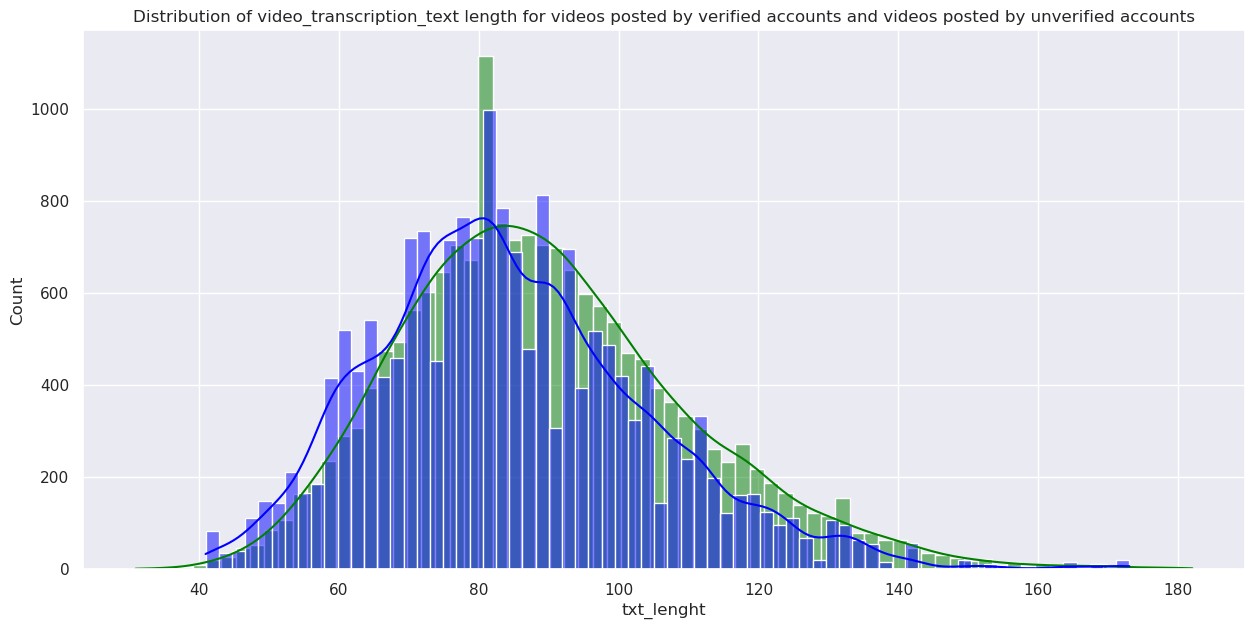

In [79]:
plt.figure(figsize=(15, 7));
sns.histplot(not_v['txt_lenght'], color='Green', kde=True);
sns.histplot(yes_v['txt_lenght'], color='Blue', kde=True);
plt.title('Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts');

print('--STATS--')
stats.shapiro(not_v['txt_lenght'])
stats.shapiro(yes_v['txt_lenght'])

print(stats.describe(not_v['txt_lenght']))
print(stats.describe(yes_v['txt_lenght']))

print('--PVal--')
stats.ttest_ind(not_v['txt_lenght'], yes_v['txt_lenght'], nan_policy='omit')

### Checking Multicollinearity

Two common ways to check for multicollinearity are:

- Create scatterplots to show the relationship between pairs of independent variables
- Use the variance inflation factor to detect multicollinearity

## Notes

The threshold for considering multicollinearity is generally considered to be a variance inflation factor (VIF) of 5 or 10.

A VIF of 10 means that the variance of the coefficient of the predictor is 10 times more than what it should be if there's no collinearity. A tolerance value of 0.2 or less is also often used as a threshold for multicollinearity. Tolerance is the reciprocal of VIF, so a tolerance value of 0.2 means that the VIF is 5.

However, it's important to note that the threshold for multicollinearity can vary depending on the specific context. For example, a VIF of 10 may be considered acceptable in a study with a large sample size, but it may be cause for concern in a study with a small sample size. Ultimately, the decision of whether or not to consider multicollinearity is a judgment call that should be made based on the specific circumstances of the study.

**Factors that can affect the threshold for multicollinearity:**

- The number of independent variables in the model. The more independent variables in the model, the more likely it is that there will be some degree of multicollinearity.
- The strength of the correlation between the independent variables. The stronger the correlation between two independent variables, the more likely it is that they will be collinear.
- The purpose of the model. If the model is being used to make predictions, then multicollinearity can be more problematic than if the model is simply being used to describe the data.
- If you suspect that there may be multicollinearity in your model, there are a few things you can do to check for it:

Calculate the VIF for each independent variable. If any of the VIFs are above 5 or 10, then you may have a problem with multicollinearity.
Calculate the tolerance for each independent variable. If any of the tolerance values are below 0.2, then you may have a problem with multicollinearity.
Plot the correlation matrix for the independent variables. If you see any pairs of variables that are highly correlated, then you may have a problem with multicollinearity.
If you do find that there is multicollinearity in your model, there are a few things you can do to address it:

Remove one of the collinear variables. This is the most straightforward approach, but it may not be possible if you need all of the variables for your model.
Combine the collinear variables into a single variable. This can be done by averaging the variables or by creating a new variable that is the sum of the variables.
Use a regularization technique such as ridge regression or lasso regression. These techniques can help to reduce the impact of multicollinearity on your model.

In [80]:
## Correlations to identify variables with high correlation
corr = df2.corr()
df2.corr()


,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,txt_lenght
video_duration_sec,1.000000,0.013892,0.004028,0.002754,0.010723,-0.000080,-0.005043
video_view_count,0.013892,1.000000,0.855343,0.793961,0.781732,0.747564,0.246867
video_like_count,0.004028,0.855343,1.000000,0.888880,0.871610,0.816416,0.217852
video_share_count,0.002754,0.793961,0.888880,1.000000,0.802867,0.766773,0.211142
video_download_count,0.010723,0.781732,0.871610,0.802867,1.000000,0.910293,0.215829
video_comment_count,-0.000080,0.747564,0.816416,0.766773,0.910293,1.000000,0.217179
txt_lenght,-0.005043,0.246867,0.217852,0.211142,0.215829,0.217179,1.000000


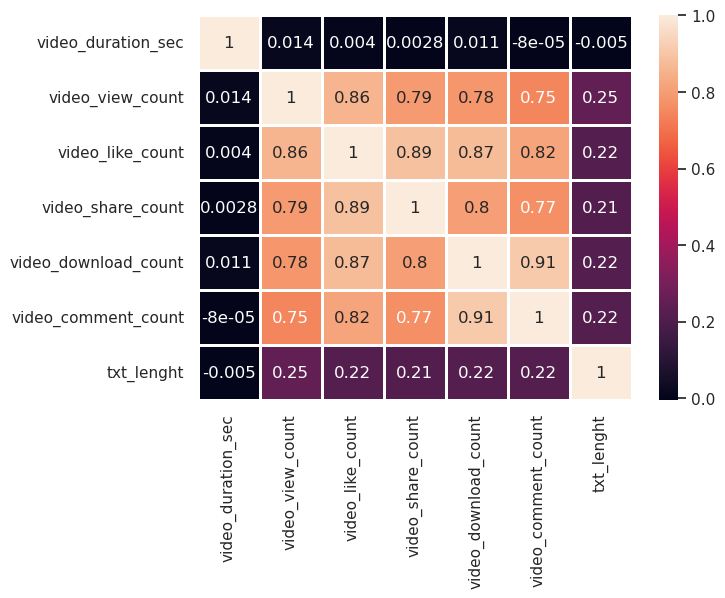

In [81]:
f, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(corr, annot=True, linewidths=1, ax=ax);

In [82]:
high_corr = ['video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']
df2[high_corr].corr()

,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
video_view_count,1.000000,0.855343,0.793961,0.781732,0.747564
video_like_count,0.855343,1.000000,0.888880,0.871610,0.816416
video_share_count,0.793961,0.888880,1.000000,0.802867,0.766773
video_download_count,0.781732,0.871610,0.802867,1.000000,0.910293
video_comment_count,0.747564,0.816416,0.766773,0.910293,1.000000


In [83]:
## Calculate the VIF for each independent variable.
## If any of the VIFs are above 5 or 10,
## then huston we have a problem with multicollinearity.

df3 = df2[high_corr]
df3 = add_constant(df3)
index = df3.columns
VIF = pd.DataFrame(index=index)
vif = []
for i in range(df3.shape[1]):
    vif.append(variance_inflation_factor(df3.values, i))

VIF['vif'] = vif

VIF.head(len(VIF))

,vif
const,1.386792
video_view_count,3.890083
video_like_count,8.606767
video_share_count,4.954257
video_download_count,8.218262
video_comment_count,6.004550


In [84]:
## I'm not sure if this is how tolerance is calculated but for practice.
tolerances = df2[high_corr].corr().to_numpy()
tolerances

array([[1.        , 0.85534269, 0.79396065, 0.78173178, 0.74756447],
       [0.85534269, 1.        , 0.88887964, 0.87160953, 0.81641617],
       [0.79396065, 0.88887964, 1.        , 0.80286743, 0.76677307],
       [0.78173178, 0.87160953, 0.80286743, 1.        , 0.91029268],
       [0.74756447, 0.81641617, 0.76677307, 0.91029268, 1.        ]])

In [85]:
## making sure the diagonal is the min.
tolerances[np.diag_indices_from(tolerances)] = 0.001
tolerances

array([[0.001     , 0.85534269, 0.79396065, 0.78173178, 0.74756447],
       [0.85534269, 0.001     , 0.88887964, 0.87160953, 0.81641617],
       [0.79396065, 0.88887964, 0.001     , 0.80286743, 0.76677307],
       [0.78173178, 0.87160953, 0.80286743, 0.001     , 0.91029268],
       [0.74756447, 0.81641617, 0.76677307, 0.91029268, 0.001     ]])

In [86]:
## is the tolerance

def calculate_tolerance(df, features):
    # Calculate the correlation coefficient between each pair of features
    tolerances = df2[high_corr].corr().to_numpy()
    tolerances[np.diag_indices_from(tolerances)] = 0.001
    # Find the highest correlation coefficient
    max_corr = tolerances.max()

    # Calculate the tolerance
    tolerance = 1 - max_corr

    return tolerance
for i in high_corr:
    print(calculate_tolerance(df2, i))

0.08970731665212717
0.08970731665212717
0.08970731665212717
0.08970731665212717
0.08970731665212717


In [87]:
VIF['vif'].sort_values( ascending=True)[:]

const                   1.386792
video_view_count        3.890083
video_share_count       4.954257
video_comment_count     6.004550
video_download_count    8.218262
video_like_count        8.606767
Name: vif, dtype: float64


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

The heatmap shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.85 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features.

Here we can observe that video_download_count and video_like_count.
Eliminating one of them will cancel multicollinearity between eachother.

```
video_view_count        3.890083  
video_share_count       4.954257  
video_comment_count     6.004550  
video_download_count    8.218262   
video_like_count        8.606767
```



# Variables Selection



In [88]:
selection = ['video_duration_sec',
             'author_ban_status',
             'video_view_count',
             'video_share_count',
             'video_download_count',
             'video_comment_count']

In [89]:
X = df2[selection]
y = df2['claim_status']

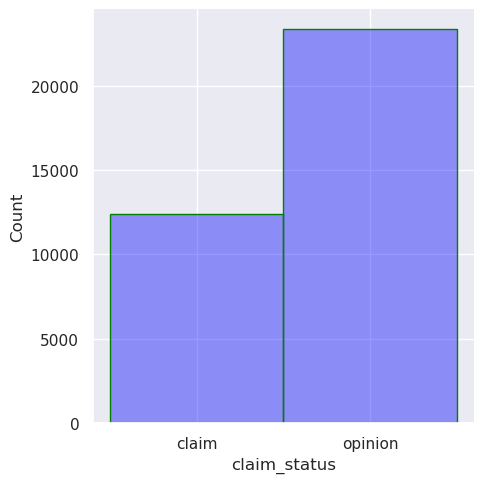

In [90]:
df2['claim_status'].value_counts()
sns.displot(df2, x='claim_status', color='blue', edgecolor='green', alpha=0.4);

## Encoding

In [91]:
##One Hot Encoding

X_enc = pd.get_dummies(X)
X_enc.columns

Index(['video_duration_sec', 'video_view_count', 'video_share_count',
       'video_download_count', 'video_comment_count',
       'author_ban_status_active', 'author_ban_status_banned',
       'author_ban_status_under review'],
      dtype='object')

In [92]:
le = LabelEncoder()

# Fit the target encoder object to the target variable
le.fit(y)

# Transform the target variable using the target encoder object
y_enc = le.transform(y)


In [93]:
## Splitting the data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((25037, 8), (10731, 8), (25037,), (10731,))

accuracy score: 0.9913335197092535
# of iterations 100


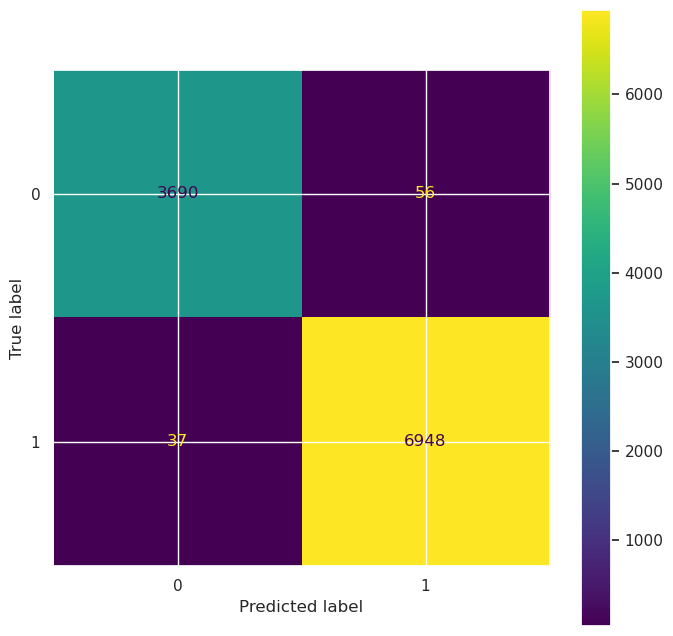

In [94]:
## Fitting the model to the data, and saving it as a variable

clf01 = LogisticRegression().fit(X_train, y_train)

## Obtaining predictions
y_pred = clf01.predict(X_test)

print('accuracy score: %s' % clf01.score(X_test, y_test))
print('# of iterations %s' % clf01.n_iter_[0])

# Calculate the values for each quadrant in the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf01.classes_)
# Create the confusion matrix as a visualization
disp = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = clf01.classes_)
# Display the confusion matrix
disp.plot();

In [95]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.99      0.99      0.99      3746
not verified       0.99      0.99      0.99      6985

    accuracy                           0.99     10731
   macro avg       0.99      0.99      0.99     10731
weighted avg       0.99      0.99      0.99     10731



In [96]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":clf01.feature_names_in_, "Model Coefficient":clf01.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,0.024573
1,video_view_count,-0.000389
2,video_share_count,-0.001291
3,video_download_count,0.022683
4,video_comment_count,-0.034143
5,author_ban_status_active,3.166410
6,author_ban_status_banned,-0.048134
7,author_ban_status_under review,0.158558


- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.01 increase in the log-odds of the user having a verified status.
- The logistic regression model had  predictive power: 99%


We developed a logistic regression model for verified status based on video features. The model had decent predictive power (69% precision and 66% recall). Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.